<a href="https://colab.research.google.com/github/Abhishek-Singh-AS/CODSOFT-ML/blob/main/Churn_Prediction_ANN%2CLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Churn_Modelling.xls')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Gender', ylabel='Age'>

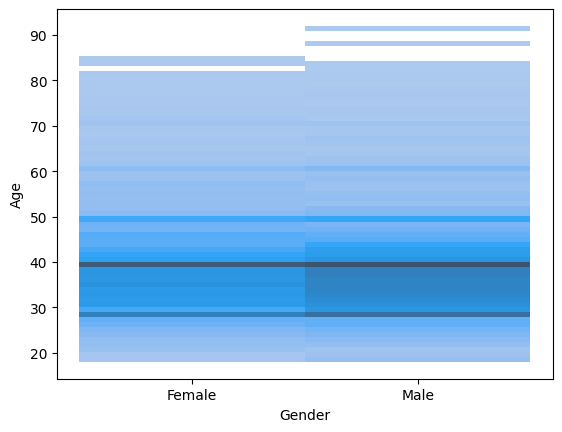

In [7]:
sns.histplot(data=df,x='Gender',y='Age')

In [8]:
df.drop(['RowNumber','CustomerId'],inplace=True,axis=1)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Gender', ylabel='Balance'>

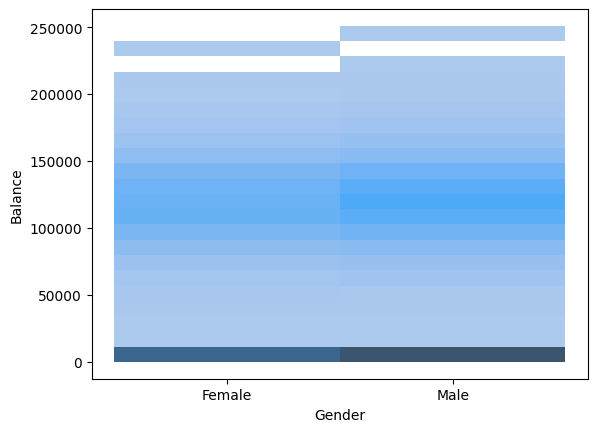

In [9]:
sns.histplot(data=df,x='Gender',y='Balance')

<Axes: xlabel='Balance', ylabel='Age'>

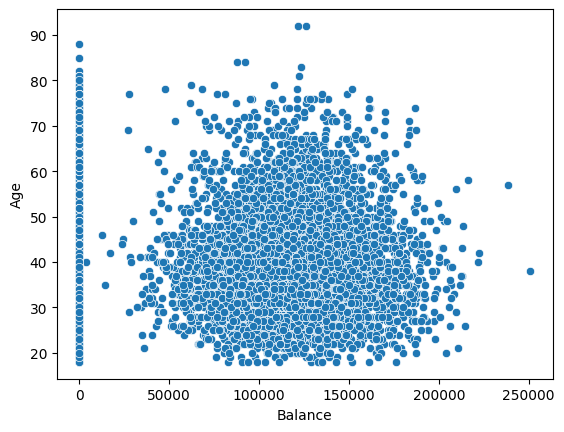

In [10]:
sns.scatterplot(data=df,x='Balance',y='Age')

<Axes: xlabel='Gender', ylabel='IsActiveMember'>

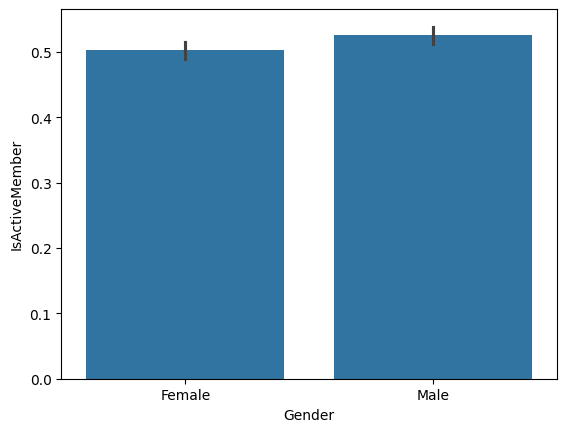

In [11]:
sns.barplot(data=df,x='Gender',y='IsActiveMember')

<Axes: xlabel='Age', ylabel='Count'>

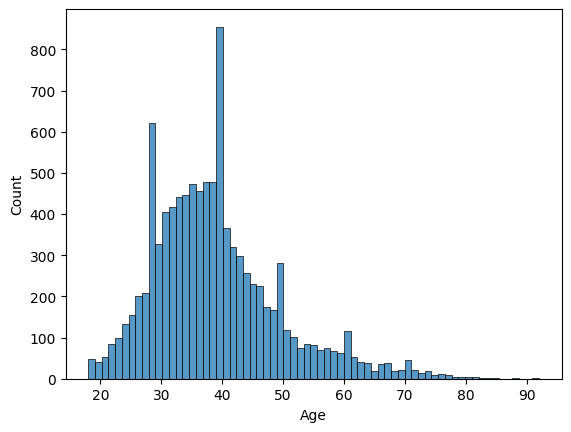

In [12]:
sns.histplot(data=df['Age'])

<Axes: xlabel='Balance', ylabel='Count'>

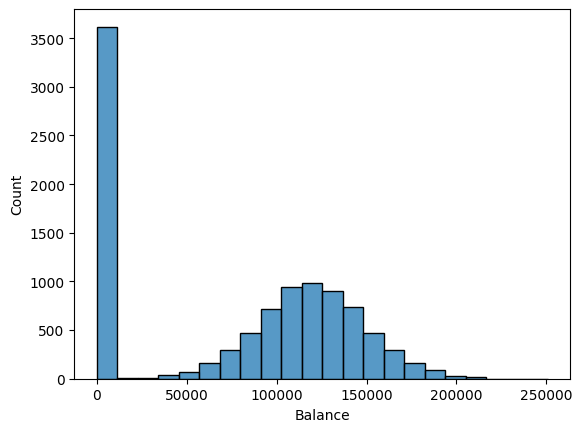

In [13]:
sns.histplot(data=df['Balance'])

In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
df=pd.get_dummies(data=df,columns=['Gender','Geography'])
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [16]:
x=df.drop(['Exited','Surname'],axis=1)
y=df['Exited']

In [17]:
x.head()
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [18]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x)
std_data=scale.transform(x)
print(std_data)

[[-0.32622142  0.29351742 -1.04175968 ...  0.99720391 -0.57873591
  -0.57380915]
 [-0.44003595  0.19816383 -1.38753759 ... -1.00280393 -0.57873591
   1.74273971]
 [-1.53679418  0.29351742  1.03290776 ...  0.99720391 -0.57873591
  -0.57380915]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 1.25683526  0.29351742 -0.69598177 ... -1.00280393  1.72790383
  -0.57380915]
 [ 1.46377078 -1.04143285 -0.35020386 ...  0.99720391 -0.57873591
  -0.57380915]]


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [20]:
x_train.shape
x_test.shape

(2000, 13)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model=Sequential()
model.add(Dense(13,activation='sigmoid',input_dim=13))
model.add(Dense(13,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7944 - loss: 0.5333 - val_accuracy: 0.7975 - val_loss: 0.4983
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.5008 - val_accuracy: 0.7975 - val_loss: 0.4977
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8072 - loss: 0.4866 - val_accuracy: 0.7975 - val_loss: 0.4977
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.5040 - val_accuracy: 0.7975 - val_loss: 0.4966
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4960 - val_accuracy: 0.7975 - val_loss: 0.4967
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4977 - val_accuracy: 0.7975 - val_loss: 0.4968
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.5032 - val_accuracy: 0.7975 - val_loss: 0.4966
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4988 - val_accuracy: 0.

In [26]:
y_pred=model.predict(x_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.13909799],
       [0.23366486],
       [0.13909799],
       ...,
       [0.13909799],
       [0.2278237 ],
       [0.23366486]], dtype=float32)

In [27]:
y_pred=y_pred.argmax(axis=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

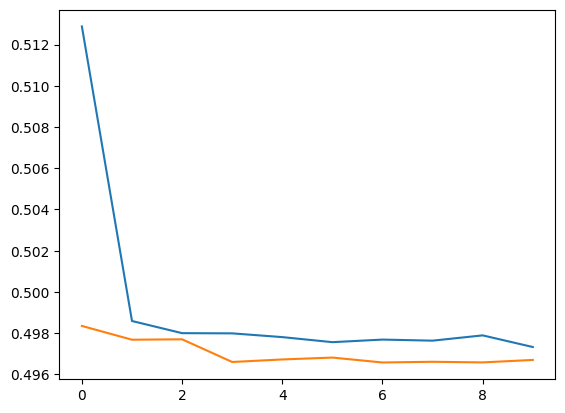

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=2)

In [32]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [38]:
# accuracy score on the training data
from sklearn.metrics import accuracy_score
x_train_prediction = clf.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [39]:
print("Accuracy-",training_data_accuracy)

Accuracy- 0.79325


In [41]:
# accuracy score on the testing data
from sklearn.metrics import accuracy_score
x_train_prediction = clf.predict(x_test)
testing_data_accuracy = accuracy_score(x_train_prediction, y_test)

In [42]:
print("Accuracy-",testing_data_accuracy)

Accuracy- 0.7885
